shallow neural network

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data (from 0-255 to 0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# One-hot encode the target labels
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Step 3: Create the model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flattening the 28x28 input images
    Dense(128, activation='relu'),  # First Dense layer with 128 neurons
    Dense(64, activation='relu'),   # Second Dense layer with 64 neurons
    Dense(10, activation='softmax') # Output layer with 10 neurons (for 10 classes)
])

model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')


10  stroke prediction

First few rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  

Dataset Information:
<cl

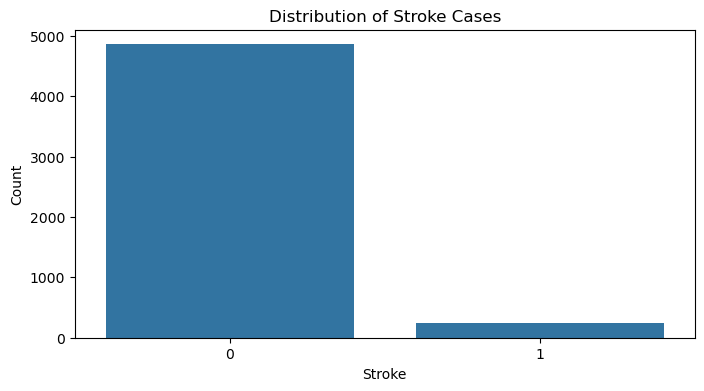

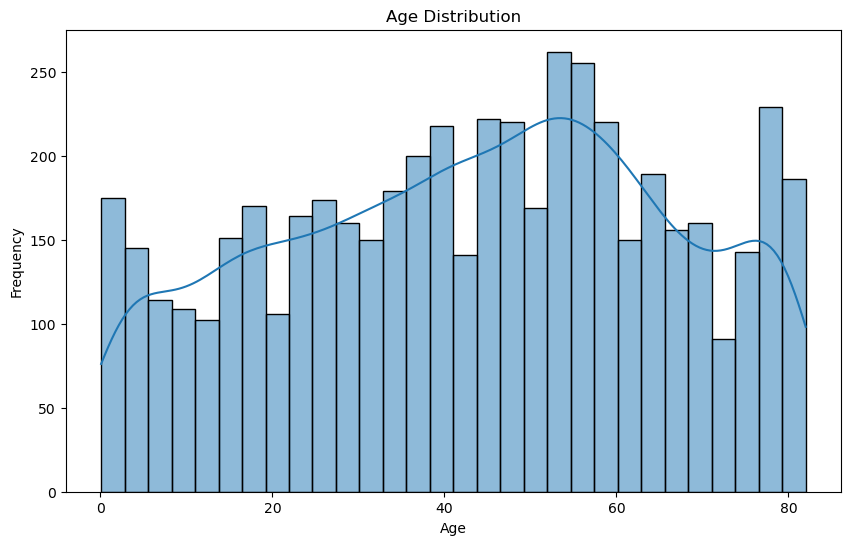

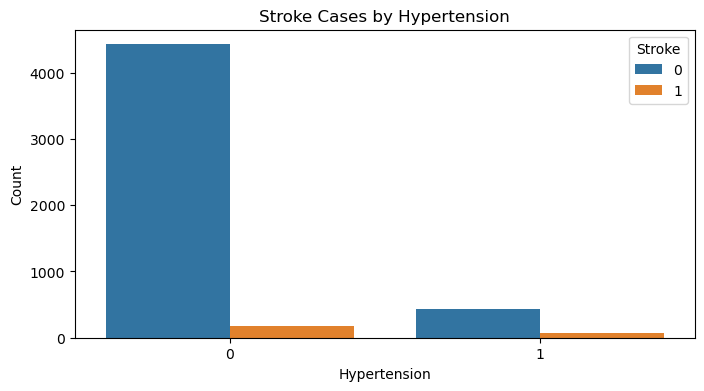

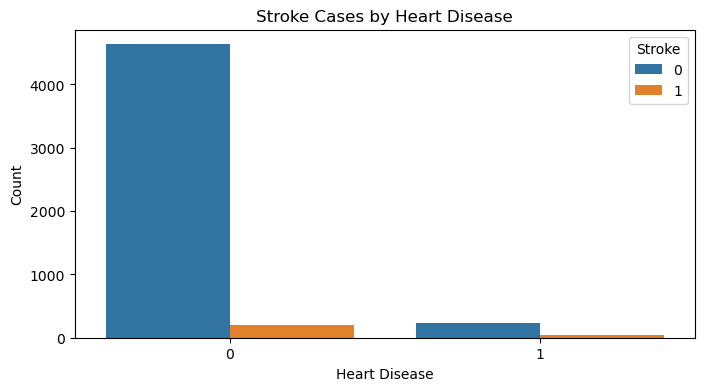

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'stroke_prediction.csv'  # Path to the dataset file
df = pd.read_csv("C:\\Users\\Lachu\\OneDrive\\Desktop\\stroke prediction.csv")

print("First few rows of the dataset:")
print(df.head())

print("\nDataset Information:")
print(df.info())

print("\nSummary Statistics:")
print(df.describe(include='all'))

print("\nTarget Variable Distribution:")
print(df['stroke'].value_counts())

# Display missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Plot the distribution of the target variable
plt.figure(figsize=(8, 4))
sns.countplot(x='stroke', data=df)
plt.title('Distribution of Stroke Cases')
plt.xlabel('Stroke')
plt.ylabel('Count')
plt.show()

# Plot age distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['age'], kde=True, bins=30)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot stroke cases by hypertension
plt.figure(figsize=(8, 4))
sns.countplot(x='hypertension', hue='stroke', data=df)
plt.title('Stroke Cases by Hypertension')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

# Plot stroke cases by heart disease
plt.figure(figsize=(8, 4))
sns.countplot(x='heart_disease', hue='stroke', data=df)
plt.title('Stroke Cases by Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.legend(title='Stroke')
plt.show()

4
i )Word tokenization
ii) Sentence tokenization
iii) Dropping Stop word
iv) Stemming
v) Lemmatization


In [28]:
import re
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

# Open and read the text file
with open("C:\\Users\\Lachu\\OneDrive\\Desktop\\notepad.txt", 'r', encoding='utf-8') as f:text = f.read()

# Text preprocessing
text = text.lower()
text = re.sub('[^A-Za-z0-9]+', ' ', text)  # Remove non-alphanumeric characters
text = re.sub("\S*\d\S*", "", text).strip()  # Remove words with digits
print("Processed text:\n", text)

# Tokenization
w = word_tokenize(text)
print("Tokenized words:\n", w)

# Stemming
ps = PorterStemmer()
ps_st = [ps.stem(i) for i in w]
print("\nStemming:\n", ps_st)

# Lemmatization
wnl = WordNetLemmatizer()
lema = [wnl.lemmatize(u) for u in w]
print("\nLemmatization:\n", lema)


# i) Word Tokenization
word_tokens = word_tokenize(text)
print("\nwork tokenization:\n")
print("Word Tokens:", word_tokens)

# ii) Sentence Tokenization
sentence_tokens = sent_tokenize(text)
print("\nSentence tokens:\n")
print("Sentence Tokens:", sentence_tokens)

# iii) Dropping Stop Words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
print("\n Dropping stop words:\n")
print("Filtered Words (Stop Words Removed):", filtered_words)

Processed text:
 information gathering is a systematic approach to collecting organizing and analyzing data that incorporates planning quality control and stakeholder involvement and it s fundamental for informed decision making and comprehensive research a systematic information gathering process involves clear objectives appropriate data collection methods e g surveys interviews observations and thorough analysis and organization of data to identify trends and support decisions using techniques like linear regression and visualization tools tactical tools such as network mappers packet sniffers domain research tools and advanced techniques like penetration testing data mining and search engines are crucial for in depth information analysis identifying vulnerabilities and enhancing cybersecurity
Tokenized words:
 ['information', 'gathering', 'is', 'a', 'systematic', 'approach', 'to', 'collecting', 'organizing', 'and', 'analyzing', 'data', 'that', 'incorporates', 'planning', 'quality',

<>:12: SyntaxWarning: invalid escape sequence '\S'
<>:12: SyntaxWarning: invalid escape sequence '\S'
C:\Users\Lachu\AppData\Local\Temp\ipykernel_9580\4271738906.py:12: SyntaxWarning: invalid escape sequence '\S'
  text = re.sub("\S*\d\S*", "", text).strip()  # Remove words with digits


11.Prepare data : Feature scaling with StandardScalar() or other method Dropping unnecessary features Data splitting Dealing with imbalanced dataset 

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_iris
from collections import Counter
import pandas as pd
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)
data['target'] = iris.target
scaler = StandardScaler()
data[iris.feature_names] = scaler.fit_transform(data[iris.feature_names])
data = data.drop(['sepal length (cm)'], axis=1)
X = data.drop(['target'], axis=1)
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
print("Original dataset:", Counter(y_train))
print("Balanced dataset:", Counter(y_train_balanced))


Original dataset: Counter({1: 41, 0: 40, 2: 39})
Balanced dataset: Counter({0: 41, 1: 41, 2: 41})


14. Building Deep Neural Network with Keras Dense Layers

C:\Users\Lachu\anaconda3\Lib\site-packages\keras\src\layers\core\input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Epoch 1/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 5s 46ms/step - accuracy: 0.6595 - loss: 0.6470 - val_accuracy: 0.8509 - val_loss: 0.3677
Epoch 2/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9052 - loss: 0.3354 - val_accuracy: 0.9474 - val_loss: 0.1809
Epoch 3/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9328 - loss: 0.2007 - val_accuracy: 0.9737 - val_loss: 0.1078
Epoch 4/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9645 - loss: 0.1308 - val_accuracy: 0.9737 - val_loss: 0.0807
Epoch 5/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9817 - loss: 0.0846 - val_accuracy: 0.9649 - val_loss: 0.0732
Epoch 6/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9712 - loss: 0.0701 - val_accuracy: 0.9649 - val_loss: 0.0797
Epoch 7/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9757 - loss: 0.0587 - val_accuracy: 0.9649 - val_loss: 0.0729
Epoch 8/50
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9888 - loss: 0.0450 - val_accuracy: 0.9649 - val

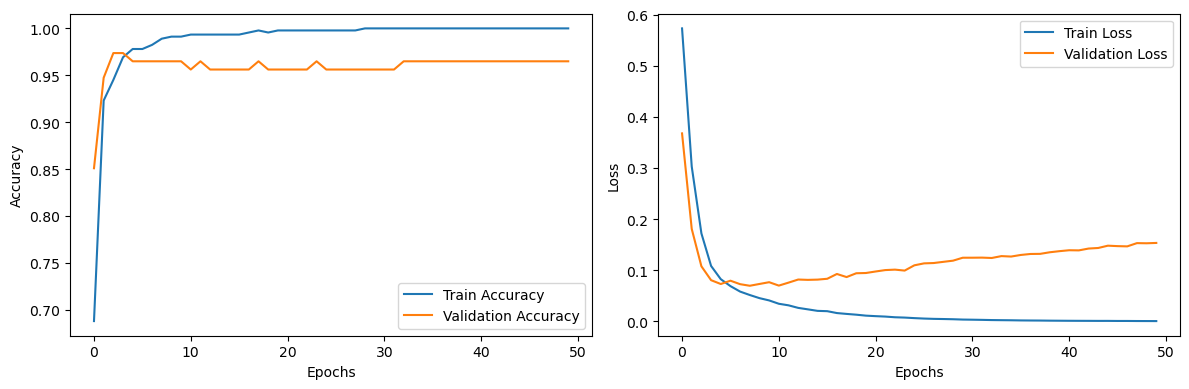

In [7]:
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt

data = load_breast_cancer()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = models.Sequential()

model.add(layers.InputLayer(input_shape=(X_train.shape[1],)))

model.add(layers.Dense(64, activation='relu'))  # First hidden layer
model.add(layers.Dense(64, activation='relu'))  # Second hidden layer
model.add(layers.Dense(32, activation='relu'))  # Third hidden layer

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot the training and validation accuracy over epochs
plt.figure(figsize=(12, 4))

# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

15. Create a complete end to end neural network model using Keras Sequential Model and Keras Layer API Eg. MNIST dataset (classify handwritten numerals) or fashion-MNIST dataset or dataset from other source

C:\Users\Lachu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 61s 121ms/step - accuracy: 0.8463 - loss: 0.4830 - val_accuracy: 0.9819 - val_loss: 0.0531
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 77s 108ms/step - accuracy: 0.9737 - loss: 0.0887 - val_accuracy: 0.9854 - val_loss: 0.0455
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 52s 110ms/step - accuracy: 0.9803 - loss: 0.0655 - val_accuracy: 0.9890 - val_loss: 0.0328
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.9838 - loss: 0.0517 - val_accuracy: 0.9892 - val_loss: 0.0311
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 107ms/step - accuracy: 0.9860 - loss: 0.0449 - val_accuracy: 0.9906 - val_loss: 0.0314
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 49s 105ms/step - accuracy: 0.9881 - loss: 0.0359 - val_accuracy: 0.9908 - val_loss: 0.0295
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 50s 106ms/step - accuracy: 0.9891 - loss: 0.0357 - val_accuracy: 0.9912 - val_loss: 0.0275
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 84s 109ms/step - accuracy: 0.9896 - loss: 0

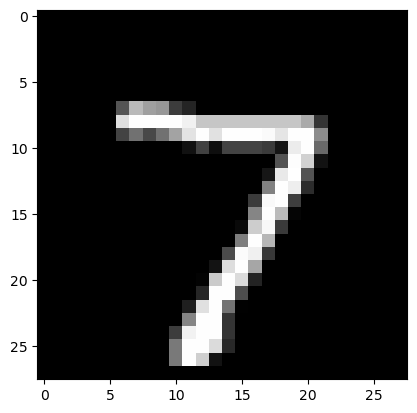

Actual: 2, Predicted: 2


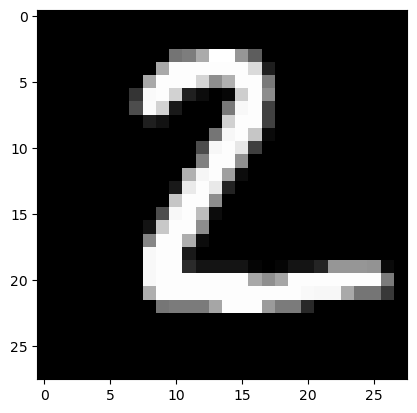

Actual: 1, Predicted: 1


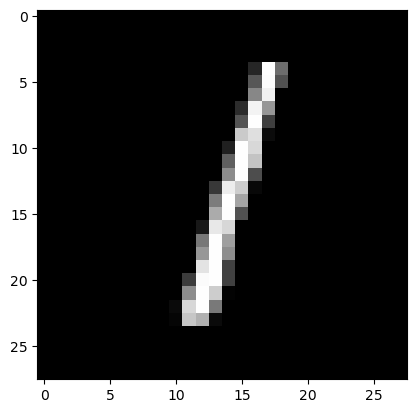

Actual: 0, Predicted: 0


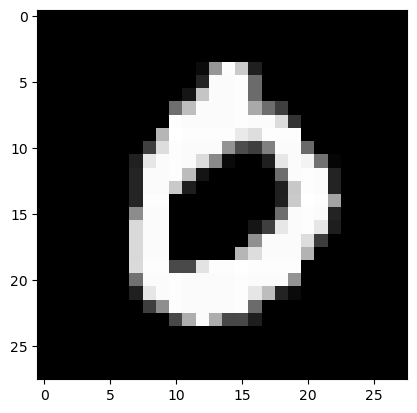

Actual: 4, Predicted: 4


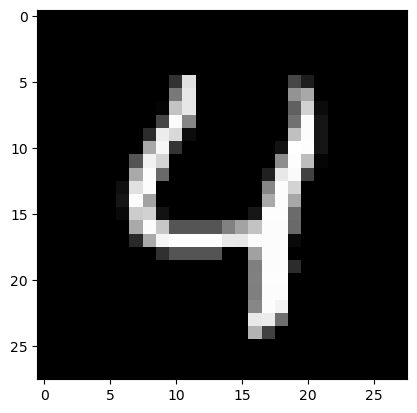

Actual: 1, Predicted: 1


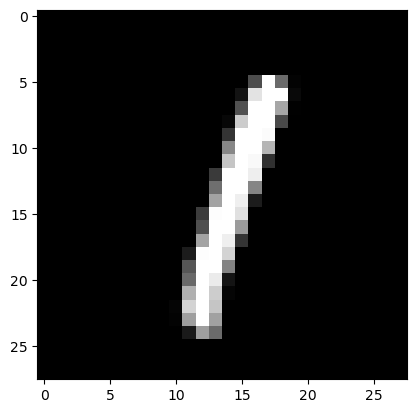

Actual: 4, Predicted: 4


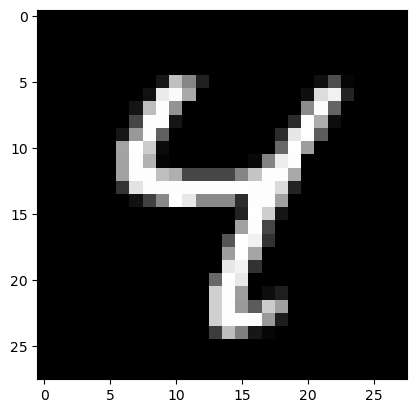

Actual: 9, Predicted: 9


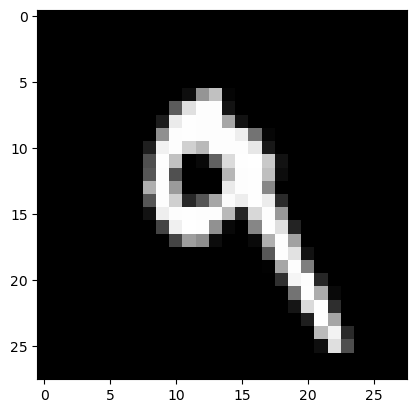

Actual: 5, Predicted: 5


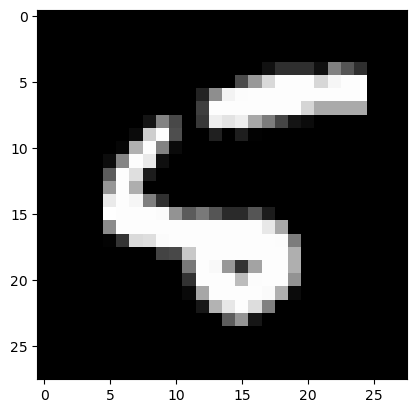

Actual: 9, Predicted: 9


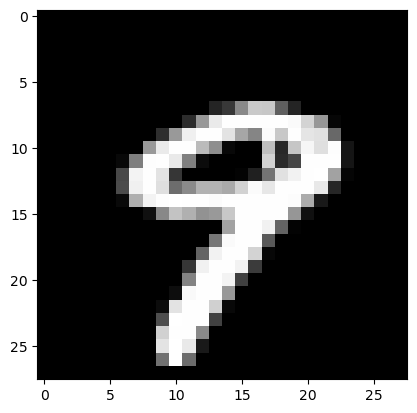

In [5]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, batch_size=128, epochs=10, verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
predictions = model.predict(x_test)
for i in range(10):
    img = x_test[i]
    pred = predictions[i]
    print(f'Actual: {np.argmax(y_test[i])}, Predicted: {np.argmax(pred)}')
    plt.imshow(img.reshape(28, 28), cmap='gray')
    plt.show()


16. Building deep learning model with TensorFlow and Keras

In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.datasets import mnist

# Load and preprocess data
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 784) / 255.0
x_test = x_test.reshape(-1, 784) / 255.0

# Build the model
model = Sequential([
    Dense(128, activation='relu', input_shape=(784,)),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy: {test_acc}')



C:\Users\Lachu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8135 - loss: 0.5999 - val_accuracy: 0.9589 - val_loss: 0.1414
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9477 - loss: 0.1765 - val_accuracy: 0.9663 - val_loss: 0.1157
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9615 - loss: 0.1293 - val_accuracy: 0.9698 - val_loss: 0.1055
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9662 - loss: 0.1111 - val_accuracy: 0.9718 - val_loss: 0.0960
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9702 - loss: 0.0914 - val_accuracy: 0.9707 - val_loss: 0.1029
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9727 - loss: 0.0874 - val_accuracy: 0.9736 - val_loss: 0.0917
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9751 - loss: 0.0791 - val_accuracy: 0.9766 - val_loss: 0.0874
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9772 - loss: 0.07

In [16]:
from nltk.util import ngrams
from nltk.tokenize import word_tokenize
file=open('C:\\Users\\Lachu\\Downloads\\Que.txt')
text=file.read()
w=word_tokenize(text)
print("Bi-Grams:\n\n",list(ngrams(w,2)))
print("\n\nTri-Grams:\n\n",list(ngrams(w,3)))


Bi-Grams:

 [('The', 'greatest'), ('greatest', 'glory'), ('glory', 'in'), ('in', 'Living'), ('Living', 'lies'), ('lies', 'not'), ('not', 'in'), ('in', 'never'), ('never', 'falling'), ('falling', 'but'), ('but', 'in'), ('in', 'raising'), ('raising', 'every'), ('every', 'Lies')]


Tri-Grams:

 [('The', 'greatest', 'glory'), ('greatest', 'glory', 'in'), ('glory', 'in', 'Living'), ('in', 'Living', 'lies'), ('Living', 'lies', 'not'), ('lies', 'not', 'in'), ('not', 'in', 'never'), ('in', 'never', 'falling'), ('never', 'falling', 'but'), ('falling', 'but', 'in'), ('but', 'in', 'raising'), ('in', 'raising', 'every'), ('raising', 'every', 'Lies')]


In [27]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# 1. Generate dummy data
X = np.random.rand(1000, 20)  # 1000 samples, 20 features
Y = np.random.randint(2, size=(1000, 1))  # Binary labels

# 2. Build the model
model = Sequential()
model.add(Dense(64, input_dim=20, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# 3. Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# 4. Train the model
model.fit(X, Y, epochs=10, batch_size=32, validation_split=0.2)

# 5. Evaluate the model on test data
loss, accuracy = model.evaluate(X, Y)
print(f"Loss: {loss}, Accuracy: {accuracy}")


C:\Users\Lachu\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 43ms/step - accuracy: 0.4812 - loss: 0.6983 - val_accuracy: 0.5350 - val_loss: 0.6941
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5171 - loss: 0.6913 - val_accuracy: 0.5500 - val_loss: 0.6925
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5428 - loss: 0.6891 - val_accuracy: 0.5250 - val_loss: 0.6922
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5687 - loss: 0.6859 - val_accuracy: 0.5050 - val_loss: 0.6931
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5673 - loss: 0.6847 - val_accuracy: 0.4950 - val_loss: 0.6935
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5585 - loss: 0.6852 - val_accuracy: 0.5250 - val_loss: 0.6927
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5958 - loss: 0.6790 - val_accuracy: 0.5200 - val_loss: 0.6928
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6039 - loss: 0.6763 - val_accuracy: 0.5450 - val_loss

In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer

# Original sentence
sentence = "Machine Learning is best platform. To group over selves."

# Word tokenization
word_tokens = word_tokenize(sentence)
print("Word Tokenization:", word_tokens)

# Sentence tokenization
sentence_tokens = sent_tokenize(sentence)
print("Sentence Tokenization:", sentence_tokens)

# Drop stop words
stop_words = set(stopwords.words('english'))
f = [word for word in word_tokens if word.lower() not in stop_words]
print("Drop Stop Words:", f)

# Stemming (Porter Stemmer)
stemmer = PorterStemmer()
stemmed_words = [stemmer.stem(word) for word in f]
print("Stemming:", stemmed_words)

# Lemmatization (WordNet)
lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in f]
print("Lemmatization:", lemmatized_words)

Word Tokenization: ['Machine', 'Learning', 'is', 'best', 'platform', '.', 'To', 'group', 'over', 'selves', '.']
Sentence Tokenization: ['Machine Learning is best platform.', 'To group over selves.']
Drop Stop Words: ['Machine', 'Learning', 'best', 'platform', '.', 'group', 'selves', '.']
Stemming: ['machin', 'learn', 'best', 'platform', '.', 'group', 'selv', '.']
Lemmatization: ['Machine', 'Learning', 'best', 'platform', '.', 'group', 'self', '.']


In [7]:
import re
from nltk.util import ngrams

# Sentence
sentence = "The greatest glory in Living lies not in never falling but in raising every Lies"

# Tokenize sentence
tokens = re.findall(r'\b\w+\b', sentence)
print("Tokens:", tokens)

# Bi-grams
bigrams = list(ngrams(tokens, 2))
print("\nBi-grams:")
for bigram in bigrams:
    print(bigram)


# Tri-grams
trigrams = list(ngrams(tokens, 3))
print("\nTri-grams:")
for trigram in trigrams:
    print(trigram)

Tokens: ['The', 'greatest', 'glory', 'in', 'Living', 'lies', 'not', 'in', 'never', 'falling', 'but', 'in', 'raising', 'every', 'Lies']

Bi-grams:
('The', 'greatest')
('greatest', 'glory')
('glory', 'in')
('in', 'Living')
('Living', 'lies')
('lies', 'not')
('not', 'in')
('in', 'never')
('never', 'falling')
('falling', 'but')
('but', 'in')
('in', 'raising')
('raising', 'every')
('every', 'Lies')

Tri-grams:
('The', 'greatest', 'glory')
('greatest', 'glory', 'in')
('glory', 'in', 'Living')
('in', 'Living', 'lies')
('Living', 'lies', 'not')
('lies', 'not', 'in')
('not', 'in', 'never')
('in', 'never', 'falling')
('never', 'falling', 'but')
('falling', 'but', 'in')
('but', 'in', 'raising')
('in', 'raising', 'every')
('raising', 'every', 'Lies')


20 Through a step-by-step process calculate TF/IDF for the given corpus and mention the words having highest value

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

# Step 1: Define the corpus
us = [
    "we are going to Mysore",
    "Mysore is a famous place",
    "we are going to famous place"
]

# Step 2: Create a TfidfVectorizer object and fit the corpus
vectorizer = TfidfVectorizer()
tf_matrix = vectorizer.fit_transform(us)

# Step 3: Convert the TF-IDF matrix into a DataFrame for easier visualization
tf_df = pd.DataFrame(tf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Step 4: Calculate the sum of TF-IDF values for each word and sort them
word_sums = tf_df.sum().sort_values(ascending=False)

# Step 5: Display the words with the highest TF-IDF values
print(word_sums)


mysore    0.907067
famous    0.868102
place     0.868102
are       0.855462
going     0.855462
to        0.855462
we        0.855462
is        0.604652
dtype: float64


15 code

C:\Users\Lachu\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8413 - loss: 0.5026 - val_accuracy: 0.9812 - val_loss: 0.0636
Epoch 2/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9823 - loss: 0.0554 - val_accuracy: 0.9835 - val_loss: 0.0562
Epoch 3/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9886 - loss: 0.0356 - val_accuracy: 0.9881 - val_loss: 0.0398
Epoch 4/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - accuracy: 0.9913 - loss: 0.0281 - val_accuracy: 0.9872 - val_loss: 0.0424
Epoch 5/5
750/750 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.9934 - loss: 0.0202 - val_accuracy: 0.9886 - val_loss: 0.0422
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9879 - loss: 0.0398
Test accuracy: 0.9905999898910522


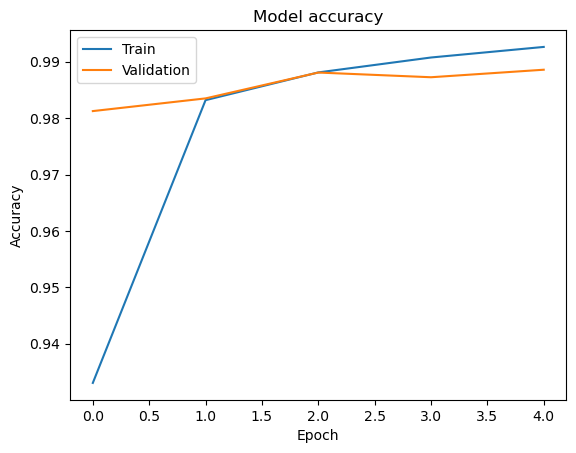

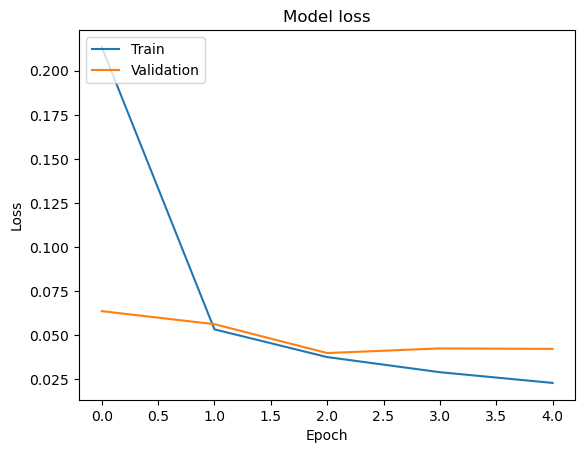

In [19]:
# Step 1: Import the required libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

# Step 2: Load and preprocess the MNIST dataset
# MNIST dataset contains 60,000 training and 10,000 testing images of handwritten digits
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape the data to fit the model
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Step 3: Build the Sequential neural network model
model = models.Sequential()

# Add a convolutional layer (32 filters, kernel size 3x3) with ReLU activation
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))

# Add a max-pooling layer (2x2 pool size)
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer (64 filters, kernel size 3x3) with ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Add another max-pooling layer (2x2 pool size)
model.add(layers.MaxPooling2D((2, 2)))

# Add another convolutional layer (64 filters, kernel size 3x3) with ReLU activation
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Flatten the output to feed into the dense layers
model.add(layers.Flatten())

# Add a fully connected (dense) layer with 64 units and ReLU activation
model.add(layers.Dense(64, activation='relu'))

# Add the output layer with 10 units (one for each digit) and softmax activation for classification
model.add(layers.Dense(10, activation='softmax'))

# Step 4: Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step 5: Train the model
# Train the model on the training data for 5 epochs
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.2)

# Step 6: Evaluate the model performance
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f'Test accuracy: {test_acc}')

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
